In [1]:
import matplotlib.pyplot as plt
import pytesseract
import requests

import sys
sys.path.append("../01_crop_image")
from get_clean_image import *

import sys
sys.path.append("../02_extract_digits")
from get_digits import *

200


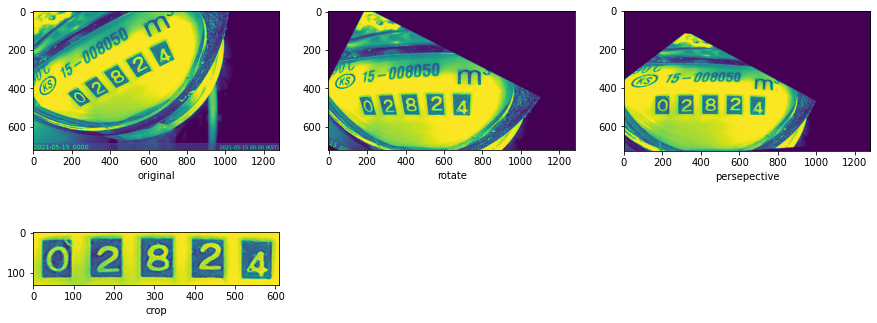

In [2]:
img = []
img.append(url_to_image('http://54.180.106.144:8080/websensor'))
img.append(rotate_image(img[0]))
img.append(fix_persepective(img[1]))
img.append(crop_image(img[2]))

label = ("original", "rotate", "persepective", "crop")
plt.figure(figsize=(15,6))
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.imshow(img[i])
    plt.xlabel(label[i])
plt.show()

img4 = img[3]
del img

In [3]:
img5 = cv2.medianBlur(img4,9)

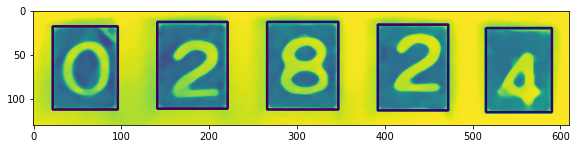

got 
got 2
got 8
got 2
got 4


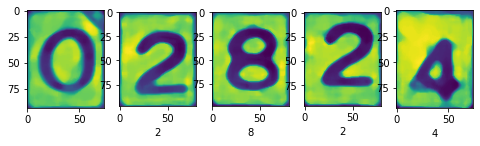

In [4]:
rois = to_digit_images(img5)
n=1
plt.figure(figsize=(8,2))
for i, digit_img in enumerate(rois):
    rd = ~digit_img
    n = pytesseract.image_to_string(rd, config='--oem 3 --psm 10 -c tessedit_char_whitelist=0123456789').replace('\x0c','').replace('\n','')
    plt.subplot(1,5,i+1)
    plt.xlabel(n)
    plt.imshow(rd)
    print('got',n)
plt.show()